# Machine Learning - Based Power Flow

This script shows how to interact with the class and apply the algorithm to new data. Please refer to README for more information about the theory. 

The file mlpf.py defines the class for the model object and all of the training / testing methods. 

In [1]:
import mlpf
import make_pf_data
import matplotlib.pyplot as plt
import numpy as np

# Create Data

~~ Not done yet, random place holders ~~

In [2]:
# ******* Come back to this ****** #
N = 24*365
n = 14
v = np.random.normal(loc=1.0, scale=0.025, size=(N,n))
a = np.random.normal(loc=0.0, scale = 0.01, size=(N,n))
p = np.random.normal(loc=1.0, scale=1.0, size=(N,n))
q = np.random.normal(loc=1.0, scale=1.0, size=(N,n))

# Initialize Model

In [3]:
model = mlpf.forward_mlpf(n)

In [6]:
print(model.numbus)
print(model.itworked)

14
Initialized!


## Supply and Pre-Process Data

~ Add methods & lines to add noise and outliers ~

In [7]:
model.supply_full_data(p, q, v, a, n, N)

In [9]:
model.process_data(0.001) # Threshold where only take training cols with mean above the threshold

## Split the Data into Training and Testing

If rand_percent == True, then a **random** train_percent of the data is taken for the training set. 

If time_sers == True, then the **first** time_percent of the data is taken for the training set. 

In [10]:
model.train_test_split_data(rand_percent = True, train_percent = 0.8, time_sers = False, time_percent = 0.8)

/Users/spowell2/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Train the Model

In [14]:
# C_set and eps_set form the box of values that the SVR model considers
C_set = [2.0]
eps_set = [1e-4,1e-3]
maxiter = 1e4

In [15]:
model.fit_svr(C_set, eps_set, maxiter)

The best C was  [[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2.]] and the best epsilon was  [[0.0001 0.0001 0.0001 0.001  0.001  0.001  0.001  0.001  0.001  0.001
  0.0001 0.001  0.0001 0.0001 0.0001 0.001  0.001  0.0001 0.0001 0.0001
  0.0001 0.001  0.001  0.0001 0.001  0.0001 0.001  0.0001]]


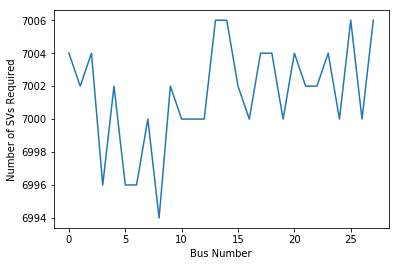

In [16]:
print('The best C was ',np.transpose(model.C_best),'and the best epsilon was ',np.transpose(model.eps_best))
plt.figure()
plt.plot(np.arange(0,2*model.n),model.num_SV)
plt.xlabel('Bus Number')
plt.ylabel('Number of SVs Required')
plt.show()

# Test the Model

Apply the model to the training set and return predictions, test error. 

In [17]:
model.test_error_svr()

In [18]:
print('The total RMSE was: ',model.total_rmse)

The total RMSE was:  0.9993908492853202


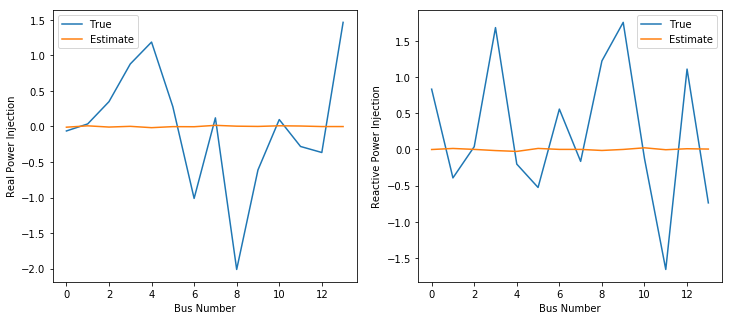

Sample Error [1.30387114]


In [19]:
sample_timestamp = 10
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.arange(0,model.n),model.y_test[sample_timestamp,np.arange(0,model.n)],np.arange(0,model.n),model.test_y_vals[sample_timestamp,np.arange(0,model.n)])
plt.xlabel('Bus Number')
plt.ylabel('Real Power Injection')
plt.legend(labels=['True','Estimate'])
plt.subplot(122)
plt.plot(np.arange(0,model.n),model.y_test[sample_timestamp,np.arange(model.n,2*model.n)],np.arange(0,model.n),model.test_y_vals[sample_timestamp,np.arange(model.n,2*model.n)])
plt.xlabel('Bus Number')
plt.ylabel('Reactive Power Injection')
plt.legend(labels=['True','Estimate'])
plt.show()
print('Sample Error '+str(model.test_error_vals[sample_timestamp]))
